IMPORTING NECESSARY LIBRARIES

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision',0)
import warnings
warnings.filterwarnings('ignore')

OUR DATAFRAME

In [77]:
confirmed_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [78]:
confirmed_df = pd.read_csv(confirmed_cases)
death_df = pd.read_csv(death_cases)
recovered_df = pd.read_csv(recovered_cases)
dates = confirmed_df.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1).keys()

In [79]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/11/21', '11/12/21', '11/13/21', '11/14/21', '11/15/21', '11/16/21',
       '11/17/21', '11/18/21', '11/19/21', '11/20/21'],
      dtype='object', length=669)

In [80]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21
0,NaN,Afghanistan,34,68,0,0,0,0,0,0,...,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864
1,NaN,Albania,41,20,0,0,0,0,0,0,...,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988
2,NaN,Algeria,28,2,0,0,0,0,0,0,...,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839
3,NaN,Andorra,43,2,0,0,0,0,0,0,...,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086
4,NaN,Angola,-11,18,0,0,0,0,0,0,...,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14,108,0,2,2,2,2,2,...,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625
276,NaN,West Bank and Gaza,32,35,0,0,0,0,0,0,...,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950
277,NaN,Yemen,16,49,0,0,0,0,0,0,...,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955
278,NaN,Zambia,-13,28,0,0,0,0,0,0,...,209953,209963,209971,209983,209996,210008,210020,210036,210043,210057


In [81]:
india_confirmed = confirmed_df[confirmed_df['Country/Region']=='India']
india_confirmed = india_confirmed.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)
india_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21
147,0,0,0,0,0,0,0,0,1,1,...,34414186,34426036,34437307,34447536,34456401,34466598,34478517,34489623,34499925,34510413


In [82]:
confirmed = confirmed_df.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)
confirmed = confirmed.sum(axis=0,skipna = True)
confirmed = pd.DataFrame(confirmed)
confirmed = confirmed.rename(columns={0: 'confirmed', "" : 'Date'})

death = death_df.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)
death = death.sum(axis=0,skipna = True)
death = pd.DataFrame(death)
death = death.rename(columns={0: 'death', "" : 'Date'})

recovered = recovered_df.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)
recovered = recovered.sum(axis=0,skipna = True)
recovered = pd.DataFrame(recovered)
recovered = recovered.rename(columns={0: 'recovered', "" : 'Date'})

lstm_dataset = confirmed

lstm_dataset['recovered'] = recovered['recovered']
lstm_dataset['death'] = death['death']
lstm_dataset.tail(667)

,confirmed,recovered,death
1/24/20,941,39,26
1/25/20,1434,42,42
1/26/20,2118,56,56
1/27/20,2927,65,82
1/28/20,5578,108,131
...,...,...,...
11/16/21,254835174,0,5114874
11/17/21,255460040,0,5124002
11/18/21,256072650,0,5132202
11/19/21,256692023,0,5140519


DATA PREPARATION

In [83]:
lstm_dataset.shape

(669, 3)

DATA PREPROCESSING

In [84]:
training_set = lstm_dataset.iloc[:,0:1].values
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scale.fit_transform(training_set)

In [85]:
import numpy as np
x, y = [], []
time_steps = 45
for i in range(len(training_set) - time_steps):
    x_ = training_set_scaled[i:(i+time_steps), 0]
    x.append(x_)
    y.append(training_set_scaled[i+time_steps, 0])
x = np.array(x)
y = np.array(y)

DATA PARTITIONING

In [87]:
split = int(len(x) * 0.8)
x_train = x[:split]
x_test = x[split:]
y_train = y[:split]
y_test = y[split:]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

MODEL BUILDING

In [88]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Input(shape=(1, time_steps)))
model.add(LSTM(48, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(48, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(48))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mean_squared_error'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 48)             18048     
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 48)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 48)             18624     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 48)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 48)                18624     
_________________________________________________________________
dropout_14 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

MODEL TRAINING

In [89]:
from keras.callbacks import ReduceLROnPlateau
batchsize = 100
epochs =  200
learning_rate_reduction = ReduceLROnPlateau(monitor='val_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-10)
history = model.fit(x_train,
                    y_train,
                    batch_size=batchsize,
                    epochs=epochs,
                    validation_split=0.2,
                    shuffle=False,
                    callbacks=[learning_rate_reduction])

Epoch 1/200
4/4 [==============================] - 14s 1s/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.3939 - val_mean_squared_error: 0.3939
Epoch 2/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.3652 - val_mean_squared_error: 0.3652
Epoch 3/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.3324 - val_mean_squared_error: 0.3324
Epoch 4/200
4/4 [==============================] - 0s 26ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.2940 - val_mean_squared_error: 0.2940
Epoch 5/200
4/4 [==============================] - 0s 26ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.2490 - val_mean_squared_error: 0.2490
Epoch 6/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.1971 - val_mean_squared_error: 0.1971
Epoch 7/200
4/4 [========================

In [90]:
scores = model.evaluate(x_train,y_train,verbose=1)
print("Performance : %.2f%%" % (scores[1]*100))

16/16 [==============================] - 3s 5ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Performance : 0.22%


PREDICTION

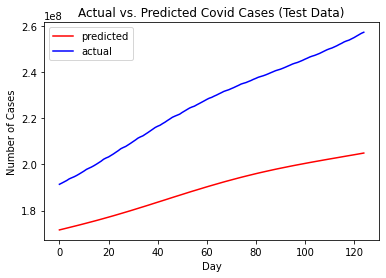

In [91]:
y_pred = model.predict(x_test)
y_pred = scale.inverse_transform(y_pred)
y_test = scale.inverse_transform(y_test.reshape(-1,1))
plt.plot(y_pred, color='red')
plt.plot(y_test, color='blue')
plt.title('Actual vs. Predicted Covid Cases (Test Data)')
plt.ylabel('Number of Cases')
plt.xlabel('Day')
plt.legend(['predicted', 'actual'])


In [92]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/11/21', '11/12/21', '11/13/21', '11/14/21', '11/15/21', '11/16/21',
       '11/17/21', '11/18/21', '11/19/21', '11/20/21'],
      dtype='object', length=669)

In [93]:
pred_days = 20
forecast = np.array([i for i in range(len(dates)+pred_days)]).reshape(-1, 1)
adjusted_dates = forecast[:-20]
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [94]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
forecast_dates = []
for i in range(len(forecast)):
    forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [95]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
forecast_dates = []
for i in range(len(forecast)):
    forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
y_pred = y_pred.reshape(1,-1)[0]
index = []
for i in range(1,21):
    index.append(i)
df = pd.DataFrame({'Date': forecast_dates[-20:], 'Covid cases worldwide': np.round(y_pred[-20:])},index)
df

,Date,Covid cases worldwide
1,11/21/2021,2e+08
2,11/22/2021,2e+08
3,11/23/2021,2e+08
4,11/24/2021,2e+08
5,11/25/2021,2e+08
6,11/26/2021,2e+08
7,11/27/2021,2e+08
8,11/28/2021,2e+08
9,11/29/2021,2e+08
10,11/30/2021,2e+08


In [96]:
india_confirmed = confirmed_df[confirmed_df['Country/Region']=='India']
india_confirmed = india_confirmed.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)
india_recovered = recovered_df[recovered_df['Country/Region']=='India']
india_recovered = india_recovered.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)
india_death = death_df[confirmed_df['Country/Region']=='India']
india_death = india_death.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)

In [97]:
india_confirmed = india_confirmed.transpose().rename(columns={147: 'Confirmed'})
india_recovered = india_recovered.transpose().rename(columns={132: 'Recovered'})
india_death = india_death.transpose().rename(columns={147: 'Death'})
lstm_data = india_confirmed
lstm_data['Recovered'] = india_recovered['Recovered']
lstm_data['Death'] = india_death['Death']
lstm_data = lstm_data[345:]
lstm_data

,Confirmed,Recovered,Death
1/1/21,10305788,9929568,149218
1/2/21,10323965,9927310,149435
1/3/21,10340469,9946867,149649
1/4/21,10356844,9975958,149850
1/5/21,10374932,9997272,150114
...,...,...,...
11/16/21,34466598,0,464153
11/17/21,34478517,0,464623
11/18/21,34489623,0,465082
11/19/21,34499925,0,465349


In [98]:
training_set = lstm_data.iloc[:,0:1].values
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scale.fit_transform(training_set)

In [99]:
import numpy as np
x, y = [], []
time_steps = 45
for i in range(len(training_set) - time_steps):
    x_ = training_set_scaled[i:(i+time_steps), 0]
    x.append(x_)
    y.append(training_set_scaled[i+time_steps, 0])
x = np.array(x)
y = np.array(y)

In [100]:
split = int(len(x) * 0.8)
x_train = x[:split]
x_test = x[split:]
y_train = y[:split]
y_test = y[split:]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [101]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Input(shape=(1, time_steps)))
model.add(LSTM(48, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(48, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(48))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mean_squared_error'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 1, 48)             18048     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 48)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 1, 48)             18624     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 48)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 48)                18624     
_________________________________________________________________
dropout_17 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [102]:
from keras.callbacks import ReduceLROnPlateau
batchsize = 100
epochs =  100
learning_rate_reduction = ReduceLROnPlateau(monitor='val_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-10)
history = model.fit(x_train,
                    y_train,
                    batch_size=batchsize,
                    epochs=epochs,
                    validation_split=0.2,
                    shuffle=False,
                    callbacks=[learning_rate_reduction])

Epoch 1/100
2/2 [==============================] - 26s 4s/step - loss: 0.3501 - mean_squared_error: 0.3501 - val_loss: 0.8518 - val_mean_squared_error: 0.8518
Epoch 2/100
2/2 [==============================] - 0s 208ms/step - loss: 0.3415 - mean_squared_error: 0.3415 - val_loss: 0.8324 - val_mean_squared_error: 0.8324
Epoch 3/100
2/2 [==============================] - 0s 87ms/step - loss: 0.3320 - mean_squared_error: 0.3320 - val_loss: 0.8112 - val_mean_squared_error: 0.8112
Epoch 4/100
2/2 [==============================] - 0s 80ms/step - loss: 0.3237 - mean_squared_error: 0.3237 - val_loss: 0.7875 - val_mean_squared_error: 0.7875
Epoch 5/100
2/2 [==============================] - 0s 71ms/step - loss: 0.3122 - mean_squared_error: 0.3122 - val_loss: 0.7606 - val_mean_squared_error: 0.7606
Epoch 6/100
2/2 [==============================] - 0s 78ms/step - loss: 0.3005 - mean_squared_error: 0.3005 - val_loss: 0.7296 - val_mean_squared_error: 0.7296
Epoch 7/100
2/2 [=======================

In [103]:
scores = model.evaluate(x_train,y_train,verbose=1)
scores
print("Performance : %.2f%%" % (scores[1]*100))

7/7 [==============================] - 0s 4ms/step - loss: 0.0071 - mean_squared_error: 0.0071
Performance : 0.71%


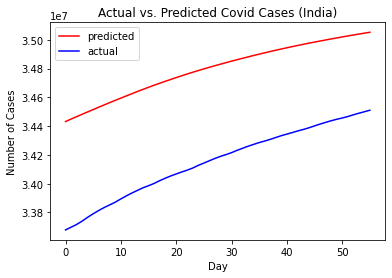

In [104]:
y_pred = model.predict(x_test)
y_pred = scale.inverse_transform(y_pred)
y_test = scale.inverse_transform(y_test.reshape(-1,1))
plt.plot(y_pred, color='red')
plt.plot(y_test, color='blue')
plt.title('Actual vs. Predicted Covid Cases (India)')
plt.ylabel('Number of Cases')
plt.xlabel('Day')
plt.legend(['predicted', 'actual'])


In [105]:
pred_days = 20
forecast = np.array([i for i in range(len(dates)+pred_days)]).reshape(-1, 1)
adjusted_dates = forecast[:-20]
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [106]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
forecast_dates = []
for i in range(len(forecast)):
    forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [107]:
y_pred = y_pred.reshape(1,-1)[0]
index = []
for i in range(1,21):
    index.append(i)
df = pd.DataFrame({'Date': forecast_dates[-20:], 'Covid cases worldwide': np.round(y_pred[-20:])},index)
df

,Date,Covid cases worldwide
1,11/21/2021,3e+07
2,11/22/2021,3e+07
3,11/23/2021,3e+07
4,11/24/2021,3e+07
5,11/25/2021,3e+07
6,11/26/2021,3e+07
7,11/27/2021,3e+07
8,11/28/2021,3e+07
9,11/29/2021,3e+07
10,11/30/2021,3e+07
